<hr/>

# Predicting House Prices - Artificial Neural Network
<hr/>

### Table of Contents
1. [Overview](#ch1)
1. [Dataset](#ch2)
1. [Exploratory Data Analysis](#ch3)
1. [Working with Feature Data](#ch4)
1. [Feature Engineering](#ch5)
1. [Scaling and Train Test Split](#ch6)
1. [Creating a Model](#ch7)
1. [Training the Model](#ch8)
1. [Evaluation on Test Data](#ch9)
1. [Predicting on a Brand New House](#ch10)

<a id="ch1"></a>
## Overview 
<hr/>

One of the objectives of this notebook is to **show step-by-step how to analyze and visualize the dataset to predict future home prices.** Moreover, we are going to explain most of the concepts used so that you understand why we are using them.
In base of features like sqft_living, bathrooms, bedrooms, view, and others, we are going to build a deep learning model that can predict future price houses. 

<br>

The following questions will be answered throughout the Kernel:
* ***Which features are available in the dataset?***
* ***Which features are categorical?***
* ***Which features are numerical?***
* ***Which features contain blank, null or empty values?***
* ***What are the data types for various features?***
* ***What is the distribution of numerical feature values across the samples?***
* ***Which features are more correlated to the price?***

<a id="ch2"></a>
## Dataset
<hr/>

* This dataset contains houses in Harare Metropolitian Province

***Feature Columns***
* **id:** Unique ID for each home sold
* **date:** Date of the home sale
* **price:** Price of each home sold
* **bedrooms:** Number of bedrooms
* **bathrooms:** Number of bathrooms, where .5 accounts for a room with a toilet but no shower


### Imports

In [258]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# scaling and train test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# creating a model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

# evaluation on test data
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn.metrics import classification_report,confusion_matrix

### Acquire data
The Python Pandas packages helps us work with our datasets. We start by acquiring the datasets into Pandas DataFrames.

In [259]:
data = pd.read_csv('../dataset/updated.csv')

### Analyze by describing data
Pandas also helps describe the datasets answering following questions early in our project.

***Which features are available in the dataset?***

In [260]:
print(data.columns.values)

['suburb' 'density' 'property' 'price' 'rooms' 'bedroom' 'toilets'
 'ensuite' 'type' 'constituency' 'council' 'carport' 'pool' 'furnished'
 'cottage' 'power' 'pbackup' 'water' 'wbackup' 'gated' 'garden']


***Which features are categorical?***

These values classify the samples into sets of similar samples. Within categorical features are the values nominal, ordinal, ratio, or interval based? Among other things this helps us select the appropriate plots for visualization.

* Categorical: id, waterfront, zipcode.

***Which features are numerical?***

Which features are numerical? These values change from sample to sample. Within numerical features are the values discrete, continuous, or timeseries based? Among other things this helps us select the appropriate plots for visualization.

* Continous: price, bathrooms, floors, lat, long.
* Discrete: date, bedrooms, sqft_living, sqft_lot, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, sqft_living15, sqft_lot15.

In [261]:
# preview the data
data.head()

,suburb,density,property,price,rooms,bedroom,toilets,ensuite,type,constituency,...,carport,pool,furnished,cottage,power,pbackup,water,wbackup,gated,garden
0,UNIT B,HIGH,HOUSE,450,7,4,2,1,SELF,ZENGEZA EAST,...,0,0,1,0,1,0,1,0,0,0
1,HIGHFIELD,HIGH,HOUSE,450,6,3,2,1,SELF,HIGHFIELD,...,2,0,1,0,1,1,1,1,0,1
2,AVONDALE,LOW,CLUSTER,200,2,0,1,0,SHARED,MOUNT PLEASANT,...,0,0,0,0,1,0,1,0,0,0
3,DOMBORAMWARI,COMPOUND,CLUSTER,80,2,0,1,0,SHARED,HUNYANI,...,0,0,0,0,0,0,0,1,0,0
4,ZENGEZA 2,HIGH,HOUSE,400,5,3,2,1,SELF,ZENGEZA WEST,...,0,0,1,0,1,1,1,1,0,0


In [262]:
# preview the data
data.tail()

,suburb,density,property,price,rooms,bedroom,toilets,ensuite,type,constituency,...,carport,pool,furnished,cottage,power,pbackup,water,wbackup,gated,garden
237,HELENSVALE,LOW,COTTAGE,700,4,3,1,0,SELF,HARARE EAST,...,1,0,1,0,1,0,1,1,0,0
238,SHAWASHA HILLS,LOW,HOUSE,2500,8,5,3,2,SELF,HARARE EAST,...,2,0,1,0,1,1,1,1,0,1
239,SHAWASHA HILLS,LOW,HOUSE,1400,7,4,4,3,SELF,HARARE EAST,...,2,0,1,1,1,0,1,1,0,1
240,SHAWASHA HILLS,LOW,CLUSTER,350,2,1,1,0,SELF,HARARE EAST,...,0,1,1,1,1,0,1,1,0,1
241,SHAWASHA HILLS,LOW,HOUSE,5000,7,4,4,1,SELF,HARARE EAST,...,2,1,1,1,1,1,1,1,0,1


***Which features contain blank, null or empty values?***

We can check for missing values with pandas isnull(). This indicates whether values are missing or not. Then we can sum all the values to check every column. 

In [263]:
# No missing values
data.isnull().sum()

suburb          0
density         0
property        0
price           0
rooms           0
bedroom         0
toilets         0
ensuite         0
type            0
constituency    0
council         0
carport         0
pool            0
furnished       0
cottage         0
power           0
pbackup         0
water           0
wbackup         0
gated           0
garden          0
dtype: int64

***What are the data types for various features?***

Five features are floats, fifteen are integers and one is an object.

In [264]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   suburb        242 non-null    object
 1   density       242 non-null    object
 2   property      242 non-null    object
 3   price         242 non-null    int64 
 4   rooms         242 non-null    int64 
 5   bedroom       242 non-null    int64 
 6   toilets       242 non-null    int64 
 7   ensuite       242 non-null    int64 
 8   type          242 non-null    object
 9   constituency  242 non-null    object
 10  council       242 non-null    object
 11  carport       242 non-null    int64 
 12  pool          242 non-null    int64 
 13  furnished     242 non-null    int64 
 14  cottage       242 non-null    int64 
 15  power         242 non-null    int64 
 16  pbackup       242 non-null    int64 
 17  water         242 non-null    int64 
 18  wbackup       242 non-null    int64 
 19  gated   

***What is the distribution of numerical feature values across the samples?***

In [265]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,242.0,851.396694,1037.418060,25.0,120.0,310.0,1200.00,5000.0
rooms,242.0,4.413223,2.525125,1.0,2.0,4.0,7.00,13.0
bedroom,242.0,2.074380,1.845327,0.0,0.0,2.0,4.00,9.0
toilets,242.0,1.706612,1.026959,1.0,1.0,1.0,2.00,7.0
ensuite,242.0,0.644628,0.918772,0.0,0.0,0.0,1.00,6.0
carport,242.0,0.450413,0.839643,0.0,0.0,0.0,0.75,4.0
pool,242.0,0.132231,0.339444,0.0,0.0,0.0,0.00,1.0
furnished,242.0,0.421488,0.503136,0.0,0.0,0.0,1.00,2.0
cottage,242.0,0.322314,0.827082,0.0,0.0,0.0,0.00,4.0
power,242.0,0.867769,0.339444,0.0,1.0,1.0,1.00,1.0


### Assumtions based on data analysis

We arrive at following assumptions based on data analysis done so far. We may validate these assumptions further before taking appropriate actions.

### Correlating

We want to know how well does each feature correlate with Price. We want to do this early in our project and match these quick correlations with modelled correlations later in the project.

### Completing

Since there are no missing values we do not need to complete any values. 

### Correcting

Id feature may be dropped from our analysis since it does not add value.
Date feature may be dropped since we are going to do feature engineering and make a year and month column.
Zipcode feature is a special case, we could use it, but since we do not know exactly the zones of King County we are just going to drop it. 

### Creating

We may want to create a new feature called Year based on Date to analyze the price change throughout the years.
We may want to create a new feature called Month based on Date to analyze the price change throughout the months.

<a id="ch3"></a>
## Exploratory Data Analysis
<hr/>

### Analyze by visualizing data
Now we can continue confirming some of our assumptions using visualizations for analyzing the data.

### Pearson correlation matrix
We use the Pearson correlation coefficient to examine the strength and direction of the linear relationship between two continuous variables.

The correlation coefficient can range in value from −1 to +1. The larger the absolute value of the coefficient, the stronger the relationship between the variables. For the Pearson correlation, an absolute value of 1 indicates a perfect linear relationship. A correlation close to 0 indicates no linear relationship between the variables. 

The sign of the coefficient indicates the direction of the relationship. If both variables tend to increase or decrease together, the coefficient is positive, and the line that represents the correlation slopes upward. If one variable tends to increase as the other decreases, the coefficient is negative, and the line that represents the correlation slopes downward.

### Price correlation
* This allow us to explore labels that are highly correlated to the price.
* sqft_living looks like a highly correlated label to the price, as well as grade, sqft_above, sqft_living15 and bathrooms.

***Which features are more correlated to the price?***

### Price feature 
* Most of the house prices are between \\$0 and \\$1,500,000.
* The average house price is \\$540,000.
* Keep in mind that it may be a good idea to drop extreme values. For instance, we could focus on house from \\$0 to \\$3,000,000 and drop the other ones.
* It seems that there is a positive linear relationship between the price and sqft_living.
* An increase in living space generally corresponds to an increase in house price.

C:\Users\T8\AppData\Local\Temp\ipykernel_2744\627235722.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['price'], ax=axes[0])


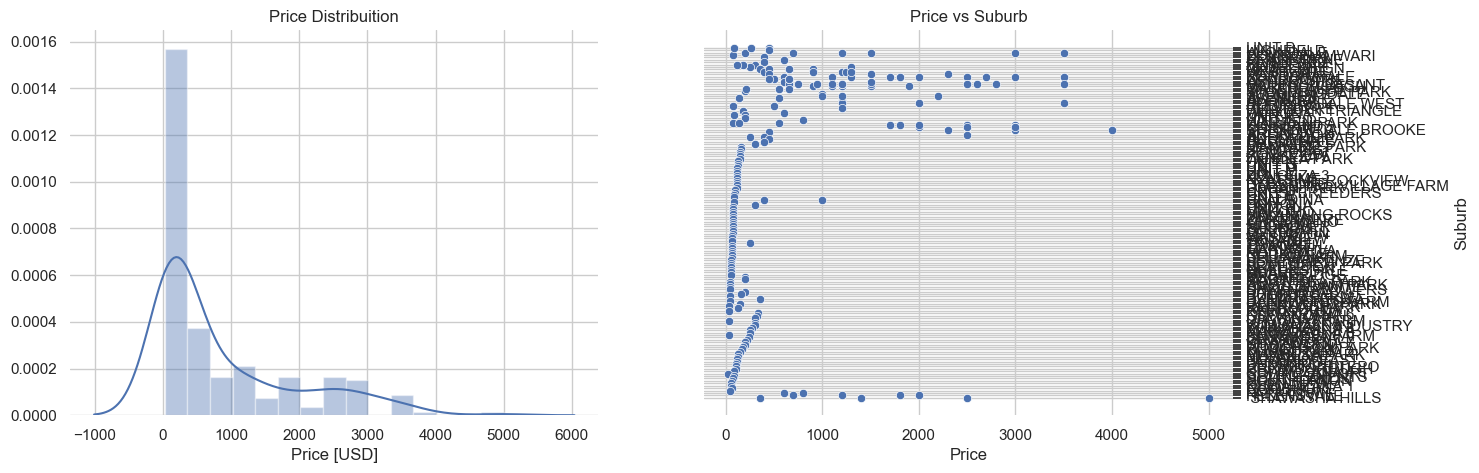

In [266]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.distplot(data['price'], ax=axes[0])
sns.scatterplot(x='price',y='suburb', data=data, ax=axes[1])
sns.despine(bottom=True, left=True)
axes[0].set(xlabel='Price [USD]', ylabel='', title='Price Distribuition')
axes[1].set(xlabel='Price', ylabel='Suburb', title='Price vs Suburb')
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

### Bedrooms and floors box plots
Box plot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending from the boxes (whiskers) indicating variability outside the upper and lower quartiles, hence the terms box-and-whisker plot. Outliers may be plotted as individual points. The spacings between the different parts of the box indicate the degree of dispersion (spread). 

* We can see outliers plotted as individual points; this probably are the more expensive houses.
* We can see that the price tends to go up when the house has more bedrooms. 

[Text(0.5, 0, 'ensuite'),
 Text(0, 0.5, 'Price'),
 Text(0.5, 1.0, 'Ensuites vs Price Box Plot')]

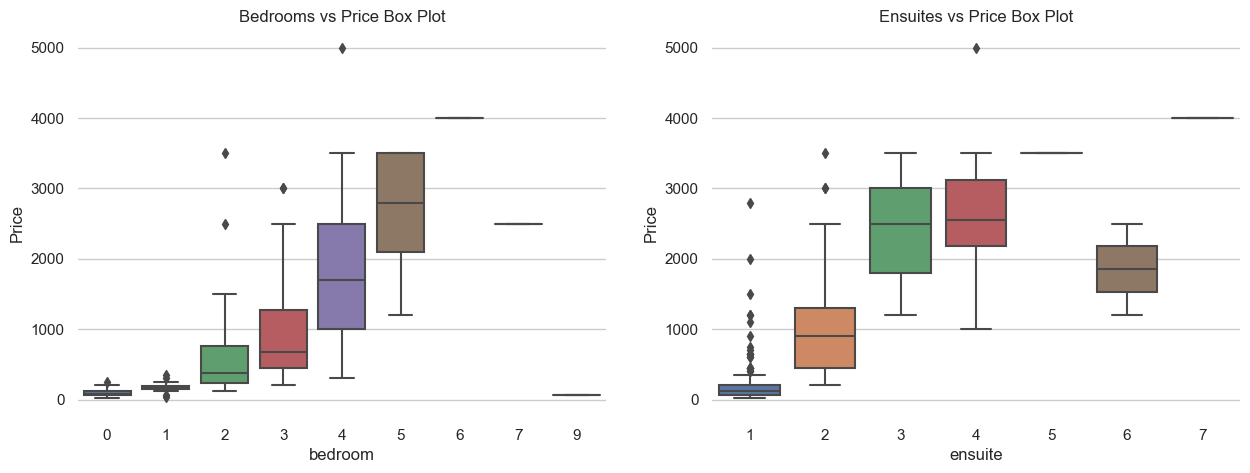

In [267]:
sns.set(style="whitegrid", font_scale=1)

f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=data['bedroom'],y=data['price'], ax=axes[0])
sns.boxplot(x=data['toilets'],y=data['price'], ax=axes[1])
sns.despine(bottom=True, left=True)
axes[0].set(xlabel='bedroom', ylabel='Price', title='Bedrooms vs Price Box Plot')
axes[1].set(xlabel='ensuite', ylabel='Price', title='Ensuites vs Price Box Plot')

### Waterfront, view and grade box plots
* Waterfront houses tends to have a better price value.
* The price of waterfront houses tends to be more disperse and the price of houses without waterfront tend to be more concentrated.
* Grade and waterfront effect price. View seem to effect less but it also has an effect on price.

[Text(0.5, 0, 'garden'),
 Text(0, 0.5, 'price'),
 Text(0.5, 1.0, 'garden vs Price Box Plot')]

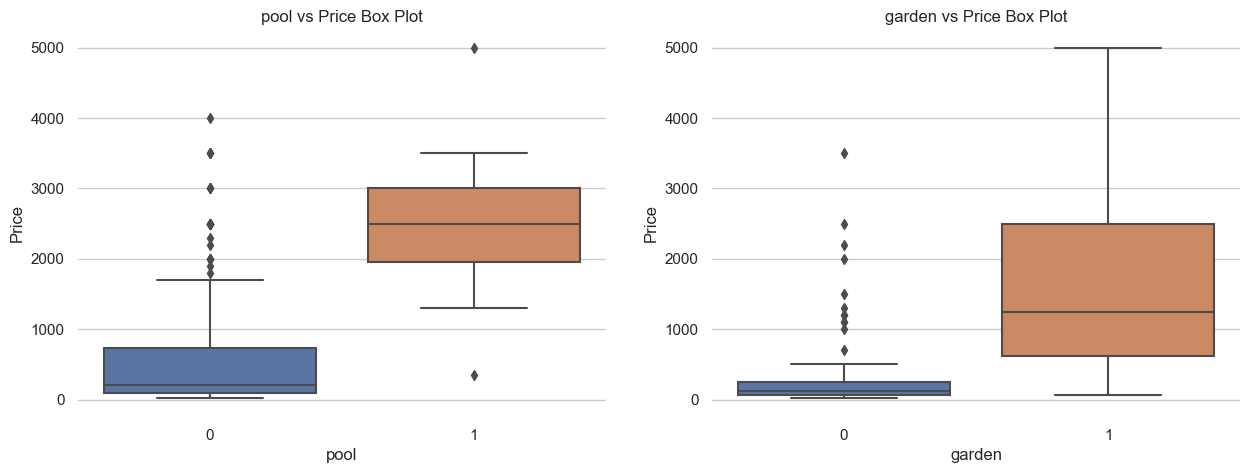

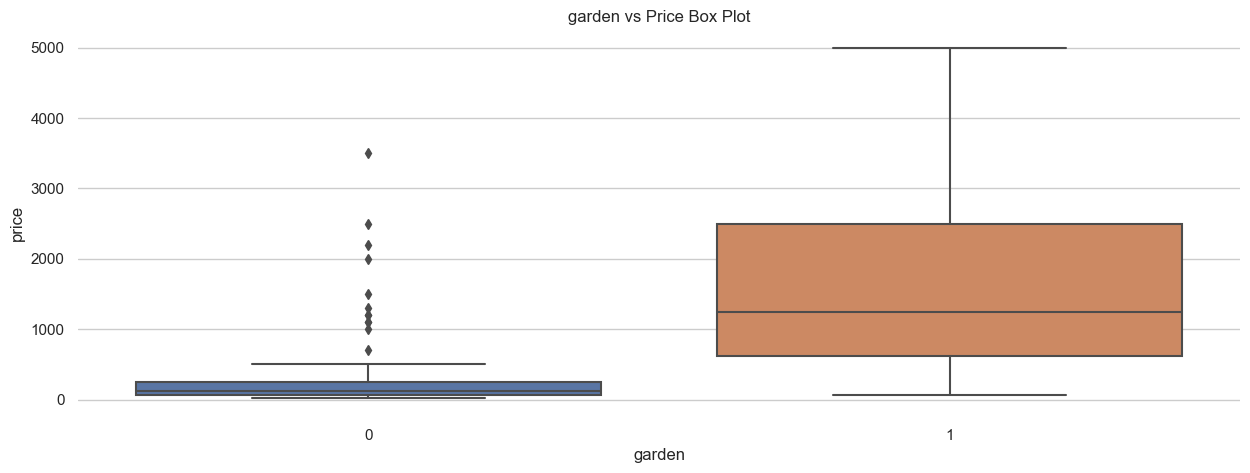

In [268]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=data['pool'],y=data['price'], ax=axes[0])
sns.boxplot(x=data['garden'],y=data['price'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='pool', ylabel='Price', title='pool vs Price Box Plot')
axes[1].set(xlabel='garden', ylabel='Price', title='garden vs Price Box Plot')

f, axe = plt.subplots(1, 1,figsize=(15,5))
sns.boxplot(x=data['garden'],y=data['price'], ax=axe)
sns.despine(left=True, bottom=True)
axe.set(xlabel='garden', ylabel='price', title='garden vs Price Box Plot')

<a id="ch4"></a>
## Working with Feature Data

<a id="ch5"></a>
## Feature engineering
<hr/>

In [269]:
# Encoding ...
from sklearn.preprocessing import LabelEncoder
LabelEncoding= LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col]= LabelEncoding.fit_transform(data[col])

data.head

<bound method NDFrame.head of      suburb  density  property  price  rooms  bedroom  toilets  ensuite  type  \
0       116        1         3    450      7        4        2        1     0   
1        57        1         3    450      6        3        2        1     0   
2         9        2         0    200      2        0        1        0     1   
3        40        0         0     80      2        0        1        0     1   
4       141        1         3    400      5        3        2        1     0   
..      ...      ...       ...    ...    ...      ...      ...      ...   ...   
237      55        2         1    700      4        3        1        0     0   
238       0        2         3   2500      8        5        3        2     0   
239       0        2         3   1400      7        4        4        3     0   
240       0        2         0    350      2        1        1        0     0   
241       0        2         3   5000      7        4        4        1     0  

<a id="ch6"></a>
## Scaling and train test split
<hr/>
Now we are ready to train a model and predict the required solution. There are 60+ predictive modelling algorithms to choose from. We must understand the type of problem and solution requirement to narrow down to a select few models which we can evaluate. Our problem is a mean squared error regression problem. We are also performing a category of machine learning which is called supervised learning as we are training our model with a given dataset.

In [270]:
# Features
X = data.drop('price',axis=1)

# Label
y = data['price']

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [271]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(193, 20)
(49, 20)
(193,)
(49,)


### Normalizing / scaling the data
We scale the feature data. To prevent data leakage from the test set, we only fit our scaler to the training set.

In [272]:
scaler = MinMaxScaler()

# fit and transfrom
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# everything has been scaled between 1 and 0
print('Max: ',X_train.max())
print('Min: ', X_train.min())

Max:  1.0
Min:  0.0


<a id="ch7"></a>
## Creating a model
***
We estimate the number of neurons (units) from our features. Ex: X_train.shape (.., 20). The optimizer is asking how you want to perform this gradient descent. In this case we are using the Adam optimizer and the mean square error loss function.

In [279]:
model = Sequential()
# input layer
model.add(Dense(20,activation='relu'))

# hidden layers
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))

# output layer
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

<a id="ch8"></a>
## Training the model
***
Now that the model is ready, we can fit the model into the data.

Since the dataset is large, we are going to use batch_size. It is typical to use batches of the power of 2 (32, 64, 128, 256...). In this case we are using 128. The smaller the batch size, the longer is going to take.

In [280]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=32,epochs=400)

Epoch 1/400
7/7 [==============================] - 2s 49ms/step - loss: 1755186.3750 - val_loss: 1958549.0000
Epoch 2/400
7/7 [==============================] - 0s 22ms/step - loss: 1754919.2500 - val_loss: 1958221.0000
Epoch 3/400
7/7 [==============================] - 0s 21ms/step - loss: 1754599.5000 - val_loss: 1957825.7500
Epoch 4/400
7/7 [==============================] - 0s 16ms/step - loss: 1754199.2500 - val_loss: 1957290.7500
Epoch 5/400
7/7 [==============================] - 0s 13ms/step - loss: 1753611.1250 - val_loss: 1956458.2500
Epoch 6/400
7/7 [==============================] - 0s 13ms/step - loss: 1752741.2500 - val_loss: 1955192.0000
Epoch 7/400
7/7 [==============================] - 0s 16ms/step - loss: 1751364.0000 - val_loss: 1953372.1250
Epoch 8/400
7/7 [==============================] - 0s 16ms/step - loss: 1749432.2500 - val_loss: 1950824.6250
Epoch 9/400
7/7 [==============================] - 0s 16ms/step - loss: 1746747.7500 - val_loss: 1947180.1250
Epoch 10/4

### Training loss per epoch
* This plot shows the training loss per epoch.
* This plot helps us to see if there is overfitting in the model. In this case there is no overfitting because both lines go down at the same time. 

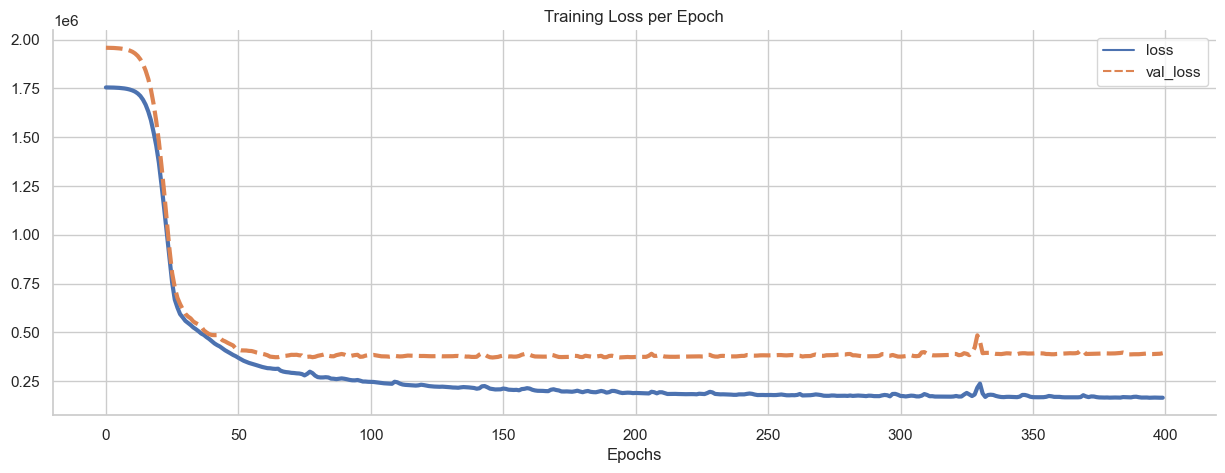

In [ ]:
losses = pd.DataFrame(model.history.history)

plt.figure(figsize=(15,5))
sns.lineplot(data=losses,lw=3)
plt.xlabel('Epochs')
plt.ylabel('')
plt.title('Training Loss per Epoch')
sns.despine()

<a id="ch9"></a>
## Evaluation on test data
---
### Regression Evaluation Metrics

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

### Predicting on brand new data
In this part we are giving the model the test set to get a list of predictions. Then we compare the correct values with the list of predictions. We use different metrics to compare the predictions, in this case we use MAE, MSE, RMSE and Variance Regression Score. 

Let us start by analyzing the MAE, which is \\$103,500. This means that our model is off on average about \\$100,000.

***Is that MAE good or bad?***

For that we must take into account our original data set and see what kind of values we have. For instance, the mean is 540,000, therefore the MEA is about 19% of the mean price. This is not a particularly good result.

To better understand this error, we can use the variance regression score, where the best possible score is 1.0 and lower values are worse. This tells you how much variance is being explain by your model. In our case we have 0.80 which is a normal result. 

In [ ]:
# predictions on the test set
predictions = model.predict(X_test)

print('MAE: ',mean_absolute_error(y_test,predictions))
print('MSE: ',mean_squared_error(y_test,predictions))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,predictions)))
print('Variance Regression Score: ',explained_variance_score(y_test,predictions))

2/2 [==============================] - 0s 6ms/step
MAE:  378.8055041566187
MSE:  393081.79490096023
RMSE:  626.9623552502655
Variance Regression Score:  0.660567247289948


### Model predictions vs perfect fit
* We can compare the model predictions with a perfect fit to see how accurate the model is.
* The red line represents the perfect prediction. 
* We are being punish by the outliers, which are the expensive houses. Our model is not good predicting luxury houses.
* On the other hand, our model is good predicting the price of houses between o and \\$2 million. There is clearly a good fit. 
* It may be worth it retraining our model just on price houses below \\$3 million.

C:\Users\T8\AppData\Local\Temp\ipykernel_2744\1451133595.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(errors, ax=axes[0])


[Text(0.5, 0, 'Test True Y'),
 Text(0, 0.5, 'Model Predictions'),
 Text(0.5, 1.0, 'Model Predictions vs Perfect Fit')]

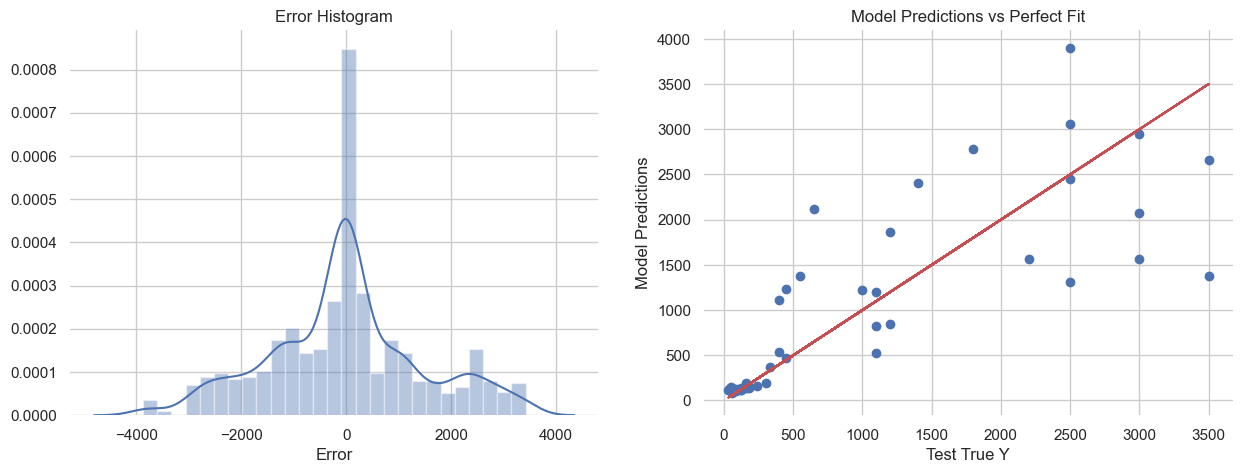

In [ ]:
f, axes = plt.subplots(1, 2,figsize=(15,5))

# Our model predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

errors = y_test.values.reshape(1, 49) - predictions
sns.distplot(errors, ax=axes[0])

sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Error', ylabel='', title='Error Histogram')
axes[1].set(xlabel='Test True Y', ylabel='Model Predictions', title='Model Predictions vs Perfect Fit')


<a id="ch10"></a>
## Predicting on a brand new house
---
We are going to use the model to predict the price on a brand-new house. We are going to choose the first house of the data set and drop the price. single_house is going to have all the features that we need to predict the price. After that we need to reshape the variable and scale the features.

In [ ]:
# fueatures of new house
single_house = data.drop('price',axis=1).iloc[0]
print(f'Features of new house:\n{single_house}')

# reshape the numpy array and scale the features
single_house = scaler.transform(single_house.values.reshape(-1, 20))

# run the model and get the price prediction
print('\nPrediction Price:', model.predict(single_house)[0,0])

# original price
print('\nOriginal Price:',data.iloc[0]['price'])

Features of new house:
suburb          116
density           1
property          3
rooms             7
bedroom           4
toilets           2
ensuite           1
type              0
constituency     28
council           0
carport           0
pool              0
furnished         1
cottage           0
power             1
pbackup           0
water             1
wbackup           0
gated             0
garden            0
Name: 0, dtype: int64
1/1 [==============================] - 0s 58ms/step

Prediction Price: 661.7733

Original Price: 450


c:\Users\T8\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
data = pd.read_csv('../dataset/updated.csv')
input = pd.read_csv('../dataset/input.csv')


data = data.astype({'rooms': 'int','bedroom': 'int', 'toilets':'int', 'ensuite':'int', 'carport':'int', 'cottage':'int'})
input = input.astype({'rooms': 'int','bedroom': 'int', 'toilets':'int', 'ensuite':'int', 'carport':'int', 'cottage':'int'})

data = pd.concat([data, input], ignore_index=True)  # Combine and reset index


print(data.tail(1))

     suburb density property  price  rooms  bedroom  toilets  ensuite  type  \
242  UNIT B    HIGH    HOUSE    450      7        4        2        1  SELF   

     constituency  ... carport  pool  furnished  cottage  power  pbackup  \
242  ZENGEZA EAST  ...       0     0          1        0      1        0   

     water  wbackup  gated  garden  
242      1        0      0       0  

[1 rows x 21 columns]


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   suburb        243 non-null    object
 1   density       243 non-null    object
 2   property      243 non-null    object
 3   price         243 non-null    int64 
 4   rooms         243 non-null    int32 
 5   bedroom       243 non-null    int32 
 6   toilets       243 non-null    int32 
 7   ensuite       243 non-null    int32 
 8   type          243 non-null    object
 9   constituency  243 non-null    object
 10  council       243 non-null    object
 11  carport       243 non-null    int32 
 12  pool          243 non-null    int64 
 13  furnished     243 non-null    int64 
 14  cottage       243 non-null    int32 
 15  power         243 non-null    int64 
 16  pbackup       243 non-null    int64 
 17  water         243 non-null    int64 
 18  wbackup       243 non-null    int64 
 19  gated   

In [ ]:
categorical_features = data.select_dtypes('object').columns
print(categorical_features)

# Encoding ...
from sklearn import preprocessing
LabelEncoder = preprocessing.LabelEncoder()
for col in data[categorical_features]:
    data[col]= LabelEncoder.fit_transform(data[col])

preprocessed_text = data.tail(1)
print(preprocessed_text)

# features of new house
single_house = preprocessed_text.drop('price',axis=1).iloc[0]
print(f'Features of new house:\n{single_house}')

# reshape the numpy array and scale the features
single_house = scaler.transform(single_house.values.reshape(-1, 20))

# run the model and get the price prediction
print('\nPrediction Price:', model.predict(single_house)[0])



Index(['suburb', 'density', 'property', 'type', 'constituency', 'council'], dtype='object')
     suburb  density  property  price  rooms  bedroom  toilets  ensuite  type  \
242     116        1         3    450      7        4        2        1     0   

     constituency  ...  carport  pool  furnished  cottage  power  pbackup  \
242            28  ...        0     0          1        0      1        0   

     water  wbackup  gated  garden  
242      1        0      0       0  

[1 rows x 21 columns]
Features of new house:
suburb          116
density           1
property          3
rooms             7
bedroom           4
toilets           2
ensuite           1
type              0
constituency     28
council           0
carport           0
pool              0
furnished         1
cottage           0
power             1
pbackup           0
water             1
wbackup           0
gated             0
garden            0
Name: 242, dtype: int64


c:\Users\T8\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 65ms/step

Prediction Price: [661.7733]
